# General Things To Check
- Is data normal?
- What is correlated?

In [156]:
# import dependencies
import pandas as pd
import numpy as np # still havent used this, maybe good to cut
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from string import ascii_letters

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
# load data
county_df = pd.read_csv('Resources/county_data.csv')
state_df = pd.read_csv('Resources/state_data.csv')

In [157]:
#see how county_df is formatted
county_df.head()

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
0,1001,Alabama,Autauga,38.9,0.330217,6.7,0.734845,54.491965,0.326964,15.237822,...,0.008903,0.779960,3320:1,18.0,30.12099,608.0,2.269588,3.910265,1.576994,1.600186
1,1003,Alabama,Baldwin,37.2,-0.043150,7.5,0.055569,63.129350,-0.052993,16.422564,...,-0.268649,0.238446,2124:1,116.0,47.07124,2417.0,2.350047,3.730943,0.636564,1.522994
2,1005,Alabama,Barbour,43.4,1.318543,6.0,1.329212,54.854696,0.311008,12.277198,...,1.731936,1.291158,3088:1,8.0,32.38080,335.0,4.065041,5.023488,0.536481,3.755365
3,1007,Alabama,Bibb,39.6,0.483957,7.6,-0.029340,43.390302,0.815326,14.785821,...,1.003403,0.979416,4401:1,5.0,22.72211,219.0,2.509741,4.552795,1.997245,1.239669
4,1009,Alabama,Blount,37.7,0.066664,7.7,-0.114250,41.355227,0.904848,14.946115,...,0.529068,0.716935,5951:1,10.0,16.80333,574.0,2.225151,4.246335,1.344023,1.810894


In [158]:
# see how state is formatted
state_df.head()

,fips,state,adult_obesity_pct,food_environment_index,exercise_access_pct,excess_drinking_pct,uninsured_num,uninsured_pct,primary_care_phys_rate,prevent_hospital_rate,...,mental_health_rate,mental_health_num,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
0,1000,Alabama,40.6,5.4,61.333795,14.477526,469887.0,11.693351,63.65235,3280.0,...,135.09263,6855.0,2016:1,2517.0,49.60294,59363.0,2.596766,3.934735,0.856498,1.665074
1,2000,Alaska,33.4,7.0,78.230166,19.610502,80538.0,13.184298,96.76895,1866.0,...,722.75394,5302.0,954:1,769.0,104.82795,14401.0,4.036109,3.564454,4.222592,6.475948
2,4000,Arizona,31.8,6.9,85.470087,18.807308,758331.0,13.132044,66.44846,1962.0,...,182.01714,13395.0,1509:1,4876.0,66.25723,138129.0,3.820823,3.533107,1.171773,4.407342
3,5000,Arkansas,39.3,4.7,63.604208,15.417446,268334.0,11.055859,67.64950,3015.0,...,261.88282,7976.0,2044:1,1490.0,48.92244,45420.0,3.316846,4.332924,1.174239,2.776484
4,6000,California,27.8,8.6,94.229806,17.245677,2640001.0,8.066461,81.09520,2153.0,...,449.82311,175563.0,1076:1,36261.0,92.90702,811077.0,4.212955,3.116360,1.304156,8.209804


In [159]:
corr_matrix = county_df.corr(numeric_only=True)


## Making Maps

In [182]:
# Ensure FIPS codes are strings and padded with leading zeros
county_df['fips'] = county_df['fips'].astype(str).str.zfill(5)

# Clean and handle the adult_obesity_pct column
county_df2 = county_df.copy()
county_df2['adult_obesity_pct'] = pd.to_numeric(county_df['adult_obesity_pct'], errors='coerce')
county_df2.dropna(subset=['adult_obesity_pct'], inplace=True)

# Create the choropleth map
fig = px.choropleth(
    county_df2,
    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    locations='fips',  # Ensure locations is set to the FIPS column
    color='adult_obesity_pct',  # The column to use for coloring
    scope='usa-states',
    hover_name='fips'
)

# Update map settings
fig.update_geos(fitbounds="locations")
fig.update_layout(title_text='Choropleth Map using FIPS Codes',
                  geo_scope='usa')

# Show the plot
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'scope' property of layout.geo
        Received value: 'usa-states'

    The 'scope' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['africa', 'asia', 'europe', 'north america', 'south
            america', 'usa', 'world']

In [161]:
my_df = county_df.sample(200)
my_df.head()

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
554,15005,Hawaii,Kalawao,28.1,NaN,NaN,NaN,100.000000,NaN,14.633789,...,NaN,NaN,82:0,0.0,0.00000,NaN,NaN,2.419794,0.000000,0.000000
2313,42127,Pennsylvania,Wayne,34.1,-0.723997,8.7,-0.963345,58.268009,0.160857,17.439369,...,-0.251468,-0.020718,1706:1,30.0,58.62467,1151.0,5.062233,3.742043,0.527983,1.451954
1086,21175,Kentucky,Morgan,42.9,1.208729,6.8,0.649936,51.070960,0.477454,14.295707,...,2.241597,1.430353,3530:1,4.0,28.32861,218.0,5.263158,5.352772,0.417101,3.441084
2409,46085,South Dakota,Lyman,41.1,0.813399,6.2,1.159393,25.766541,1.590593,17.407645,...,-0.264288,-1.070135,3692:0,0.0,0.00000,43.0,2.548903,3.733761,0.286738,3.799283
380,12109,Florida,St. Johns,24.6,-2.810463,8.7,-0.963345,84.551522,-0.995353,22.915713,...,-1.400938,-0.537858,2019:1,152.0,49.53706,3484.0,2.333041,2.999390,0.372582,1.243767


In [162]:
county_df2 = county_df
county_df2['adult_obesity_pct'] = pd.to_numeric(county_df['adult_obesity_pct'], errors='coerce')
county_df2.dropna(subset=['adult_obesity_pct'], inplace=True)

In [163]:
county_df2

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
0,01001,Alabama,Autauga,38.9,0.330217,6.7,0.734845,54.491965,0.326964,15.237822,...,0.008903,0.779960,3320:1,18.0,30.12099,608.0,2.269588,3.910265,1.576994,1.600186
1,01003,Alabama,Baldwin,37.2,-0.043150,7.5,0.055569,63.129350,-0.052993,16.422564,...,-0.268649,0.238446,2124:1,116.0,47.07124,2417.0,2.350047,3.730943,0.636564,1.522994
2,01005,Alabama,Barbour,43.4,1.318543,6.0,1.329212,54.854696,0.311008,12.277198,...,1.731936,1.291158,3088:1,8.0,32.38080,335.0,4.065041,5.023488,0.536481,3.755365
3,01007,Alabama,Bibb,39.6,0.483957,7.6,-0.029340,43.390302,0.815326,14.785821,...,1.003403,0.979416,4401:1,5.0,22.72211,219.0,2.509741,4.552795,1.997245,1.239669
4,01009,Alabama,Blount,37.7,0.066664,7.7,-0.114250,41.355227,0.904848,14.946115,...,0.529068,0.716935,5951:1,10.0,16.80333,574.0,2.225151,4.246335,1.344023,1.810894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,56037,Wyoming,Sweetwater,34.3,-0.680071,7.9,-0.284069,92.621593,-1.350354,19.345175,...,-0.412888,-0.024526,1654:1,25.0,60.46680,811.0,4.157482,3.637753,0.699523,1.685215
3146,56039,Wyoming,Teton,21.7,-3.447384,8.7,-0.963345,99.228494,-1.640991,23.095982,...,-2.104978,-1.844725,931:1,25.0,107.35604,454.0,2.727218,2.544521,2.842893,4.887781
3147,56041,Wyoming,Uinta,33.3,-0.899699,8.5,-0.793526,63.662592,-0.076451,16.665512,...,-0.772185,-0.445128,1151:1,18.0,86.90614,339.0,3.824890,3.405617,0.385109,3.016688
3148,56043,Wyoming,Washakie,33.6,-0.833811,8.6,-0.878436,76.356539,-0.634856,15.901863,...,-0.814004,-0.993827,1103:1,7.0,90.68532,154.0,3.991706,3.378598,0.291121,3.493450


In [164]:
print(county_df[['fips', 'adult_obesity_z']].head())  # Make sure 'fips' and 'adult_obesity_z' have correct values
county_df['adult_obesity_pct'] = pd.to_numeric(county_df['adult_obesity_pct'], errors='coerce')
county_df['adult_obesity_pct'].fillna(county_df['adult_obesity_pct'].mean(), inplace=True)



    fips  adult_obesity_z
0  01001         0.330217
1  01003        -0.043150
2  01005         1.318543
3  01007         0.483957
4  01009         0.066664


C:\Users\rosem\AppData\Local\Temp\ipykernel_34184\1545216000.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [165]:
cool_subset = county_df.sample(300)
fig = px.choropleth(
    cool_subset, 
    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    locations='fips',
    color='food_environment_index',
    scope='usa',
    hover_name='fips'
)


fig.update_geos(fitbounds="locations")
fig.update_layout(title_text='Choropleth Map using FIPS Codes',
                  geo_scope='usa')


In [166]:
# Define a function to create Linear Regression plots
def cool_linear_regression_function(x_choice, y_choice, cool_xlabel, cool_ylabel):
    # set parameters
    x = state_df[x_choice]
    y = state_df[y_choice]
    # get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x,y)
    print(f"The r² value is {round(r**2,3)}")

    # Plot data points
    plt.scatter(x, y, label='County Data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')
    
    # Set labels
    plt.title(f"{x_choice} VS {y_choice}")
    plt.xlabel(cool_xlabel)
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.text(x.min(),y.max(), equation_text, fontsize=12, color='red')
    
    plt.legend()

    plt.show()

In [171]:
for col in county_df.columns:
    print(col)

fips
state
county
adult_obesity_pct
adult_obesity_z
food_environment_index
food_environment_index_z
exercise_access_pct
exercise_access_z
excess_drinking_pct
excess_drinking_z
uninsured_num
uninsured_pct
uninsured_z
primary_care_phys_rate
primary_care_phys_z
prevent_hospital_rate
prevent_hospital_z
income_inequal_80pct
income_inequal_20pct
income_inequal_ratio
income_inequal_z
early_death_count
early_death_years_lost
mental_health_ratio
mental_health_rate
mental_health_num
housing_z
unemployment_z
physical_inactive_z
smoking_z
dentists_z
mental_health_z
poor_health_z
poor_phys_health_z
poor_mental_health_z
dentists_ratio
dentists_num
dentists_rate
unemployment_num
unemployment_pct
poor_physical_health_avg_days
housing_inad_facil
housing_overcrowding


In [179]:
county_df.groupby('state').apply(lambda x: x.isna().sum())[['early_death_years_lost','food_environment_index',
                                                            'primary_care_phys_rate','income_inequal_80pct',
                                                            'income_inequal_20pct', 'income_inequal_ratio',
                                                            'adult']]

C:\Users\rosem\AppData\Local\Temp\ipykernel_34184\3511675648.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
state,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,1,0,0,0,0,...,0,0,4,4,4,0,0,0,0,0
Alaska,0,0,0,0,6,3,6,0,6,0,...,6,6,1,1,1,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,6,6,6,0,0,0,0,0
California,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Colorado,0,0,0,0,5,1,5,0,5,0,...,5,5,4,4,4,0,0,0,0,0
Connecticut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Delaware,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The r² value is 0.505


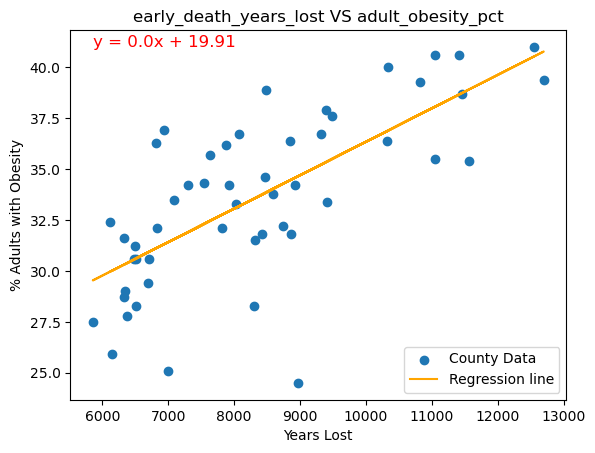

In [183]:
cool_linear_regression_function('early_death_years_lost',
                                'adult_obesity_pct',
                                'Years Lost','% Adults with Obesity')

The r² value is 0.125


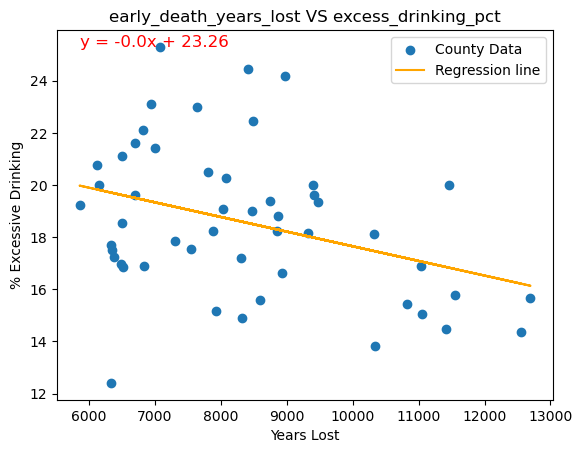

In [185]:
cool_linear_regression_function('early_death_years_lost',
                                'excess_drinking_pct',
                                'Years Lost',r'% Excessive Drinking')